In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankmarketing/bankmarketing.csv


In [2]:
from pandasql import sqldf

# Define a reusable function for running SQL queries
run_query = lambda query: sqldf(query, globals())

# **Let's assume this as coding practice**

## 1. Data Accessing

In [3]:
marketing = pd.read_csv('/kaggle/input/bankmarketing/bankmarketing.csv')
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 20 default attributes available in this dataset. It contained:
* around 41 thousands row of data points, and none of them contains null values
* Data Types: 5 -> float64, 5 -> int 64 and 10 -> object
* 6.6MB+ memory usage

In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It's discovered that some of the attributes contains negative values, this is something new from technical perspective.

In [4]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


The breakdown of numbers of unique values for each attributes:

In [5]:
marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [21]:
marketing.mean(numeric_only=True).round(2)

age                 40.02
duration           258.29
campaign             2.57
pdays              962.48
previous             0.17
emp.var.rate         0.08
cons.price.idx      93.58
cons.conf.idx      -40.50
euribor3m            3.62
nr.employed       5167.04
dtype: float64

In [7]:
index = marketing.columns
index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# To determine if there is any duplicate columns at index
marketing.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### 1.1 Age
There isn't any age between 17 to 98 not discoverable in this dataset.

In [6]:
var = marketing['age'].unique()
sorted_var = np.sort(var)
print(sorted_var)
print(f"Data Type： {sorted_var.dtype}")

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
Data Type： int64


In [10]:
var.min()

17

In [11]:
var.max()

98

In [14]:
query_1 = """
SELECT AVG(age) AS Age, COUNT(*) AS Ordered_Age_Counts
FROM marketing
GROUP BY age
ORDER BY age ASC;
"""
result_1 = run_query(query_1)
print(result_1)

     Age  Ordered_Age_Counts
0   17.0                   5
1   18.0                  28
2   19.0                  42
3   20.0                  65
4   21.0                 102
..   ...                 ...
73  91.0                   2
74  92.0                   4
75  94.0                   1
76  95.0                   1
77  98.0                   2

[78 rows x 2 columns]


In [6]:
import plotly.express as px

# fig = px.box(result_1, x="Age", y="Ordered_Age_Counts", color="Indicator")
# fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
# fig.show()

fig = px.bar(result_1, x="Age", y="Ordered_Age_Counts", 
             title="Age Distribution")
fig.show()

In [5]:
'''
https://www.linkedin.com/pulse/categorizing-age-ranges-sql-python-r-power-bi-ms-excel-anyaegbu-kyd9f/
'''
query_1 = """
SELECT *,  
    CASE WHEN age BETWEEN 0 AND 17 THEN 'Underage'
         WHEN age BETWEEN 18 AND 32 THEN '18-32 Young Adulthood' 
         WHEN age BETWEEN 33 AND 45 THEN '33-45 Adulthood'
         WHEN age BETWEEN 46 AND 65 THEN '46-65 Senior Adult'
         WHEN age BETWEEN 66 AND 75 THEN '66-75 Pre-retirement'
         ELSE '75+ Senior Citizen'
    END AS age_range
FROM marketing_cleaned;
"""
processed_marketing = run_query(query_1)
print(processed_marketing)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [7]:
processed_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,33-45 Adulthood
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,33-45 Adulthood
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,46-65 Senior Adult


In [8]:
query_1 = """
SELECT age_range, COUNT(age_range) AS Ordered_Age_Counts
FROM processed_marketing
GROUP BY age_range
ORDER BY age_range ASC;
"""
result_1 = run_query(query_1)
print(result_1)

               age_range  Ordered_Age_Counts
0               Underage                   5
1  18-32 Young Adulthood               11168
2        33-45 Adulthood               18175
3     46-65 Senior Adult               11210
4   66-75 Pre-retirement                 373
5     75+ Senior Citizen                 245


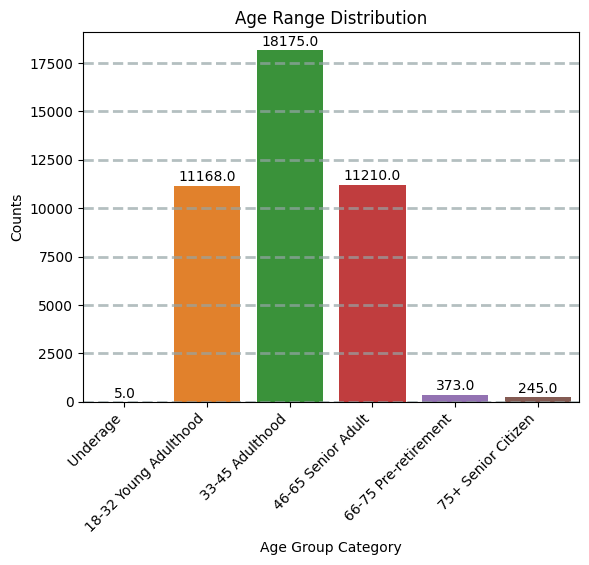

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


splot = sns.barplot(data=result_1, x='age_range', y='Ordered_Age_Counts')

# https://www.geeksforgeeks.org/python/how-to-annotate-bars-in-grouped-barplot-in-python/
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')
    
#rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Age Group Category')
plt.ylabel('Counts')
plt.title('Age Range Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.2 Job
12 jobs were discovered in this dataset, such as:

In [14]:
var = marketing['job'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Data Type： object


In [15]:
query_1 = """
SELECT job as Job, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY job
ORDER BY job ASC;
"""
result_1 = run_query(query_1)
print(result_1)

              Job  Ordered_Counts
0          admin.           10419
1     blue-collar            9253
2    entrepreneur            1456
3       housemaid            1060
4      management            2924
5         retired            1718
6   self-employed            1421
7        services            3967
8         student             875
9      technician            6739
10     unemployed            1014
11        unknown             330


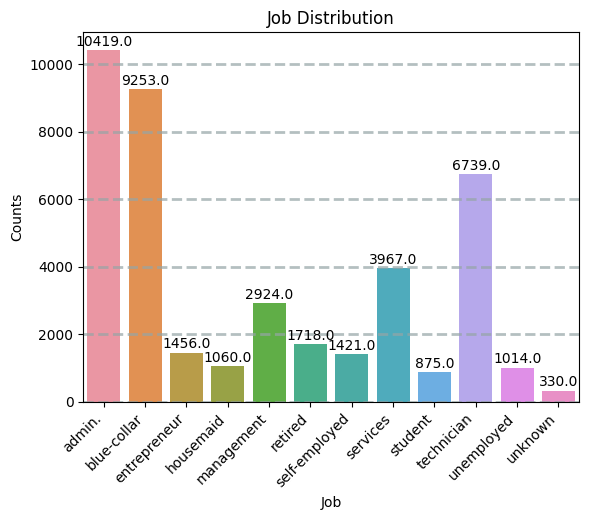

In [19]:
splot = sns.barplot(data=result_1, x='Job', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job')
plt.ylabel('Counts')
plt.title('Job Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.3 Marital

In [20]:
var = marketing['marital'].unique()
print(var)
print(f"Data Type： {var.dtype}")

['married' 'single' 'divorced' 'unknown']
Data Type： object


In [21]:
query_1 = """
SELECT marital as Marital, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY marital
ORDER BY marital ASC;
"""
result_1 = run_query(query_1)
print(result_1)

    Marital  Ordered_Counts
0  divorced            4611
1   married           24921
2    single           11564
3   unknown              80


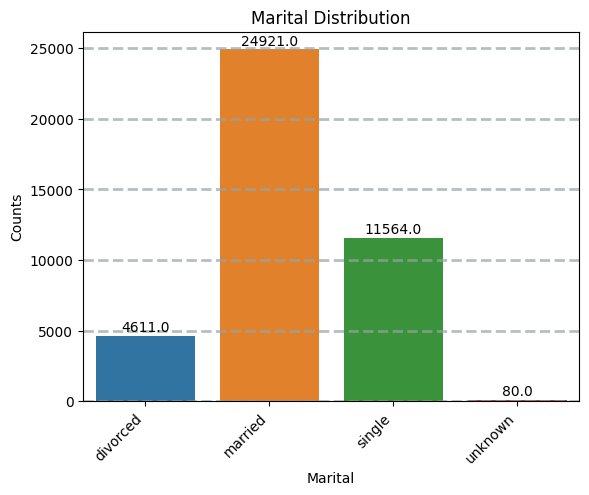

In [22]:
splot = sns.barplot(data=result_1, x='Marital', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital')
plt.ylabel('Counts')
plt.title('Marital Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.4 Education

In [39]:
processed_marketing['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [23]:
query_1 = """
SELECT education as Education, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY education
ORDER BY education ASC;
"""
result_1 = run_query(query_1)
print(result_1)

             Education  Ordered_Counts
0             basic.4y            4176
1             basic.6y            2291
2             basic.9y            6045
3          high.school            9512
4           illiterate              18
5  professional.course            5240
6    university.degree           12164
7              unknown            1730


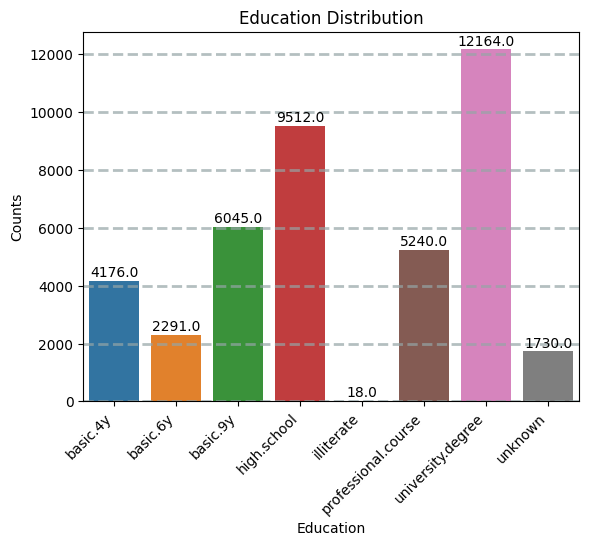

In [24]:
splot = sns.barplot(data=result_1, x='Education', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')
    
#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Education Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.5 Default

In [16]:
processed_marketing['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [20]:
processed_marketing['default'].nunique()

3

In [25]:
query_1 = """
SELECT `default` AS Status, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY `default`
ORDER BY `default` ASC;
"""
result_1 = run_query(query_1)
print(result_1)

    Status  Ordered_Counts
0       no           32577
1  unknown            8596
2      yes               3


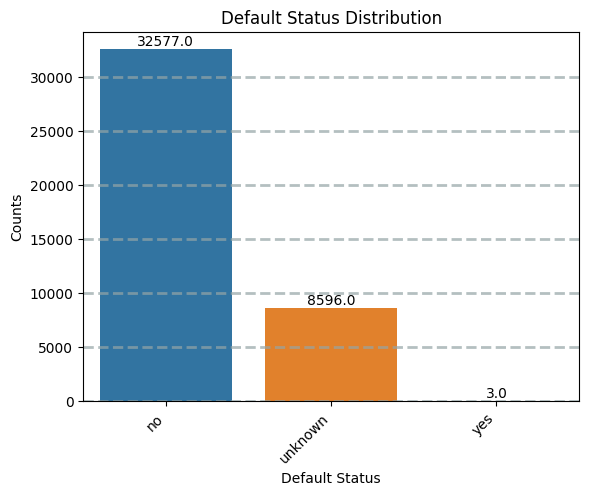

In [26]:
splot = sns.barplot(data=result_1, x='Status', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Default Status')
plt.ylabel('Counts')
plt.title('Default Status Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.6 Housing

In [32]:
processed_marketing['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [28]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


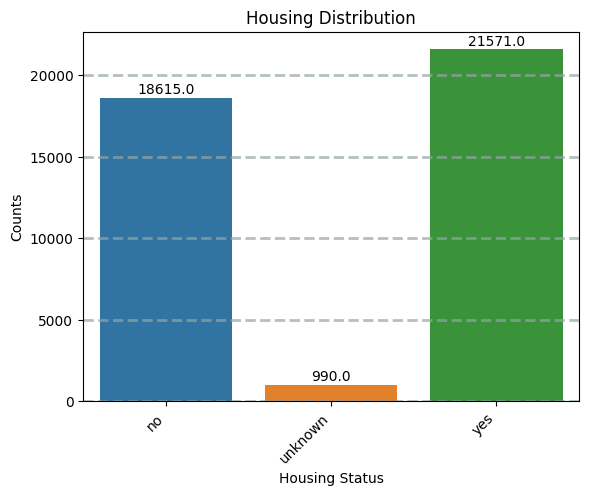

In [29]:
splot = sns.barplot(data=result_1, x='Housing', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Housing Status')
plt.ylabel('Counts')
plt.title('Housing Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.7 Loan

In [33]:
processed_marketing['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [34]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


### 1.8 Contact

In [35]:
processed_marketing['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [36]:
query_1 = """
SELECT housing AS Housing, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY housing
ORDER BY housing ASC;
"""
result_1 = run_query(query_1)
print(result_1)

   Housing  Ordered_Counts
0       no           18615
1  unknown             990
2      yes           21571


### 1.9 Month

This dataset seems containing data from April to December only, can we assume this as the subset of another dataset?

In [37]:
processed_marketing['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [40]:
query_1 = """
SELECT month AS Month, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY month
ORDER BY Ordered_Counts DESC;
"""
result_1 = run_query(query_1)
print(result_1)

  Month  Ordered_Counts
0   may           13767
1   jul            7169
2   aug            6176
3   jun            5318
4   nov            4100
5   apr            2631
6   oct             717
7   sep             570
8   mar             546
9   dec             182


### 1.10 day_of_week

In [41]:
processed_marketing['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [42]:
query_1 = """
SELECT day_of_week AS `Day of Week`, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY day_of_week
ORDER BY day_of_week ASC;
"""
result_1 = run_query(query_1)
print(result_1)

  Day of Week  Ordered_Counts
0         fri            7826
1         mon            8512
2         thu            8618
3         tue            8086
4         wed            8134


### 1.11 Duration

In [44]:
var = processed_marketing['duration'].unique()
print(var)
print(f"Data Type： {var.dtype}")

[ 261  149  226 ... 1246 1556 1868]
Data Type： int64


In [45]:
query_1 = """
SELECT duration AS Duration, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY duration
ORDER BY duration ASC;
"""
result_1 = run_query(query_1)
print(result_1)

      Duration  Ordered_Counts
0            0               4
1            1               3
2            2               1
3            3               3
4            4              12
...        ...             ...
1539      3631               1
1540      3643               1
1541      3785               1
1542      4199               1
1543      4918               1

[1544 rows x 2 columns]


In [47]:
processed_marketing[['duration']].nunique()

duration    1544
dtype: int64

In [48]:
processed_marketing[['duration']].min()

duration    0
dtype: int64

In [49]:
processed_marketing[['duration']].max()

duration    4918
dtype: int64

In [51]:
processed_marketing[['duration']].mean().round(2)

duration    258.32
dtype: float64

In [53]:
processed_marketing[['duration']].describe()

,duration
count,41176.000000
mean,258.315815
std,259.305321
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [6]:
query_1 = """
SELECT *,  
    CASE WHEN duration BETWEEN 0 AND 120 THEN '0s-120s Short Call'
         WHEN duration BETWEEN 121 AND 200 THEN '121-200s Medium Call' 
         WHEN duration BETWEEN 201 AND 400 THEN '201-400s Medium Long Call'
         WHEN duration BETWEEN 401 AND 600 THEN '401-600s Medium Long Call'
         ELSE '601s+ Long call'
    END AS call_duration
FROM processed_marketing;
"""
processed_marketing = run_query(query_1)
print(processed_marketing)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  previous  

In [7]:
query_1 = """
SELECT call_duration AS `Call Duration`, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY call_duration
ORDER BY call_duration ASC;
"""
result_1 = run_query(query_1)
print(result_1)

               Call Duration  Ordered_Counts
0         0s-120s Short Call           12912
1       121-200s Medium Call            9839
2  201-400s Medium Long Call           11261
3  401-600s Medium Long Call            3700
4            601s+ Long call            3464


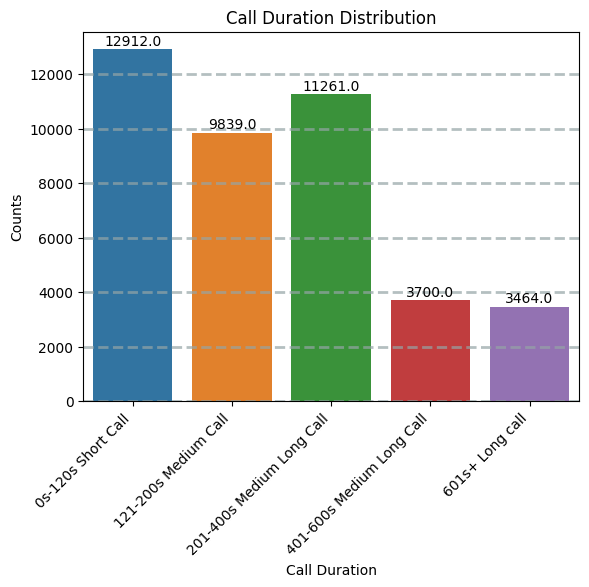

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

splot = sns.barplot(data=result_1, x='Call Duration', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Call Duration')
plt.ylabel('Counts')
plt.title('Call Duration Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.12 Campaign

In [ ]:
var = np.sort(
    marketing['campaign'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

### 1.13 pdays

In [ ]:
var = np.sort(
    marketing['pdays'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
var = marketing['previous'].unique()
print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
marketing['poutcome'].unique()

In [ ]:
var = np.sort(
    marketing['emp.var.rate'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
var = np.sort(
    marketing['cons.price.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
var = np.sort(
    marketing['cons.conf.idx'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
var = np.sort(
    marketing['euribor3m'].unique()
)

print(var)
print(f"Data Type： {var.dtype}")

In [ ]:
var = np.sort(
    marketing['nr.employed'].unique()
)
print(var)
print(f"Data Type： {var.dtype}")

In [27]:
marketing['y'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
query_1 = """
SELECT y AS Indicator, COUNT(*) AS Ordered_Counts
FROM processed_marketing
GROUP BY y
ORDER BY y ASC;
"""
result_1 = run_query(query_1)
print(result_1)

  Indicator  Ordered_Counts
0        no           36537
1       yes            4639


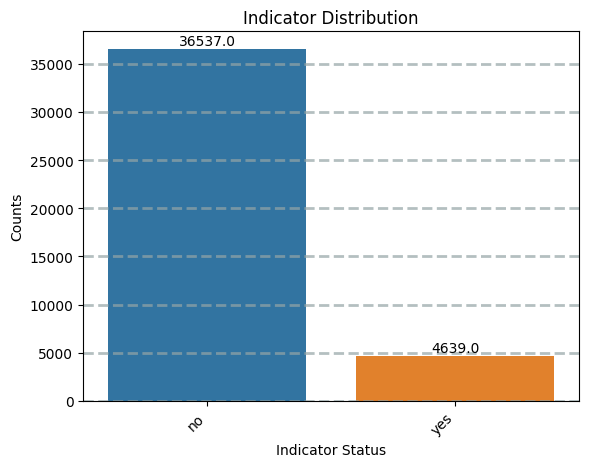

In [31]:
splot = sns.barplot(data=result_1, x='Indicator', y='Ordered_Counts') 

for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

#rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Indicator Status')
plt.ylabel('Counts')
plt.title('Indicator Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## 2. Data Cleaning

There were 12 rows of duplicated rows of records detected and identified.

In [ ]:
marketing.duplicated().sum()

In [ ]:
marketing.duplicated()

In [4]:
# Reference: https://www.youtube.com/watch?v=g8o7zjeL3js&t=238s
duplicated_rows = marketing[marketing.duplicated()]
duplicated_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [4]:
marketing_cleaned = marketing.drop_duplicates()
marketing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## 3. EDA

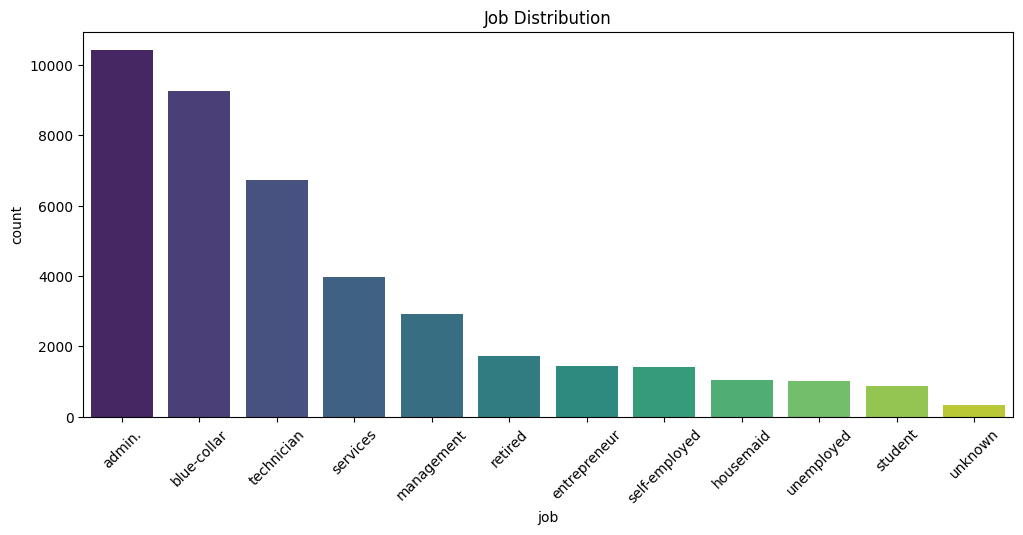

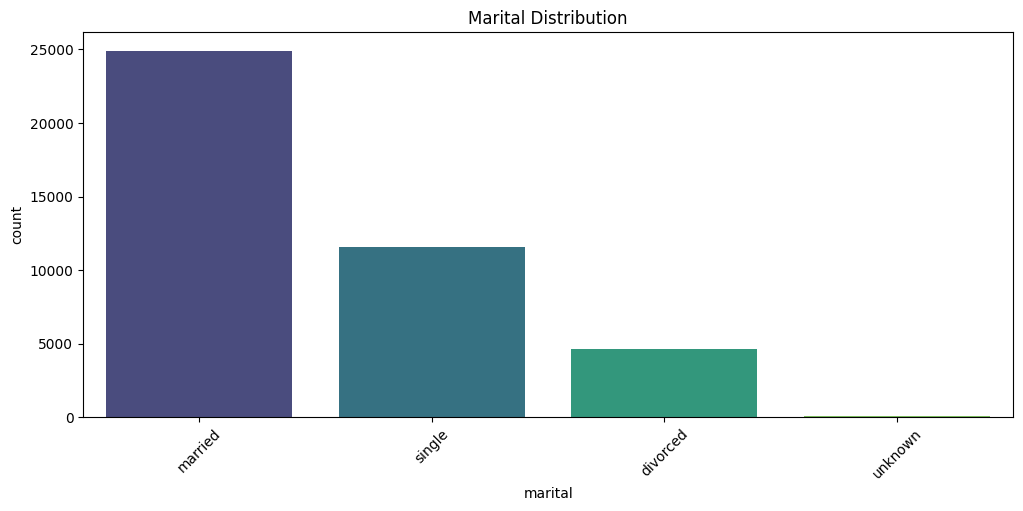

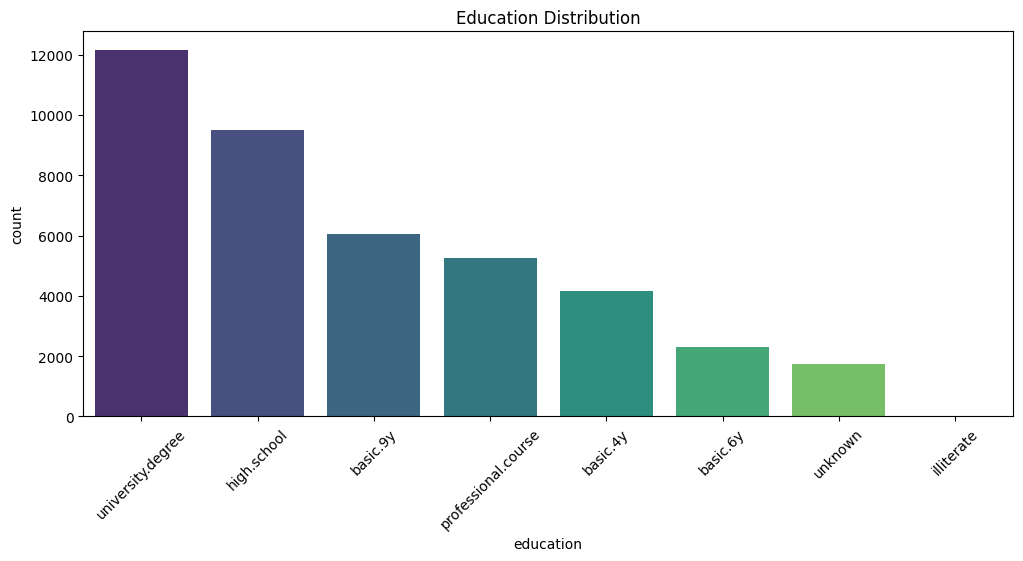

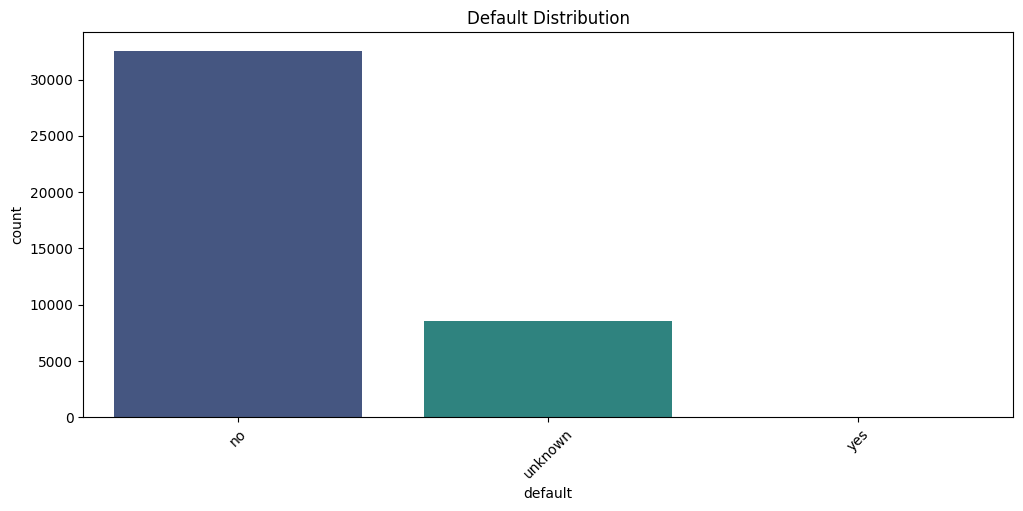

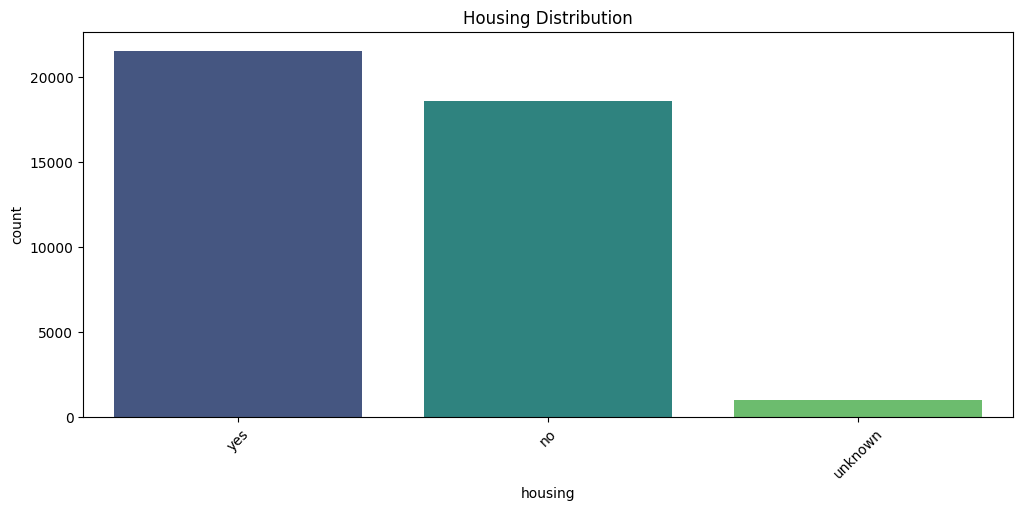

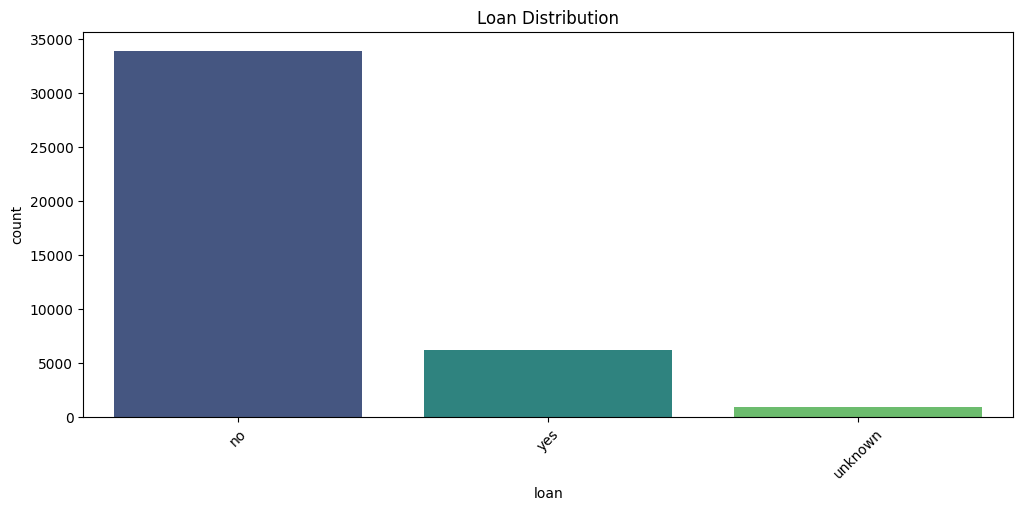

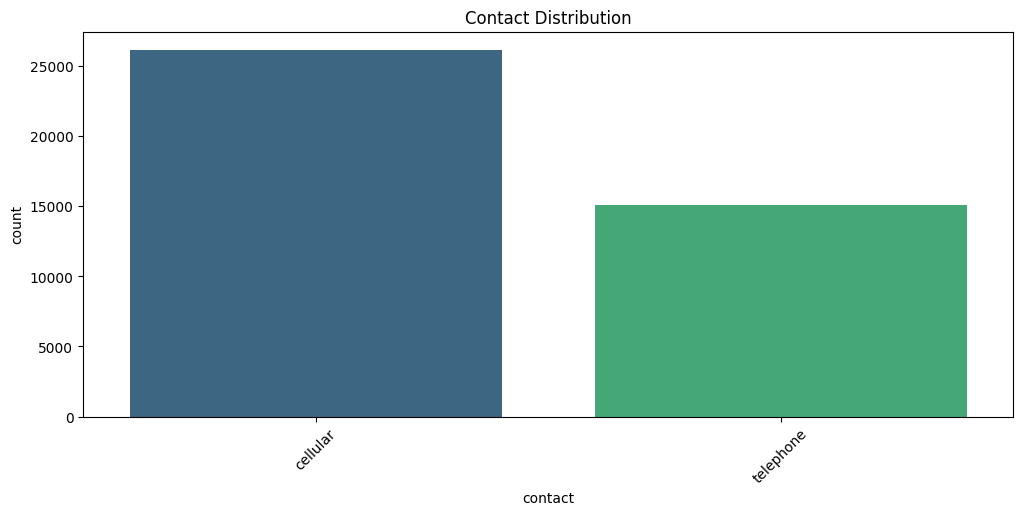

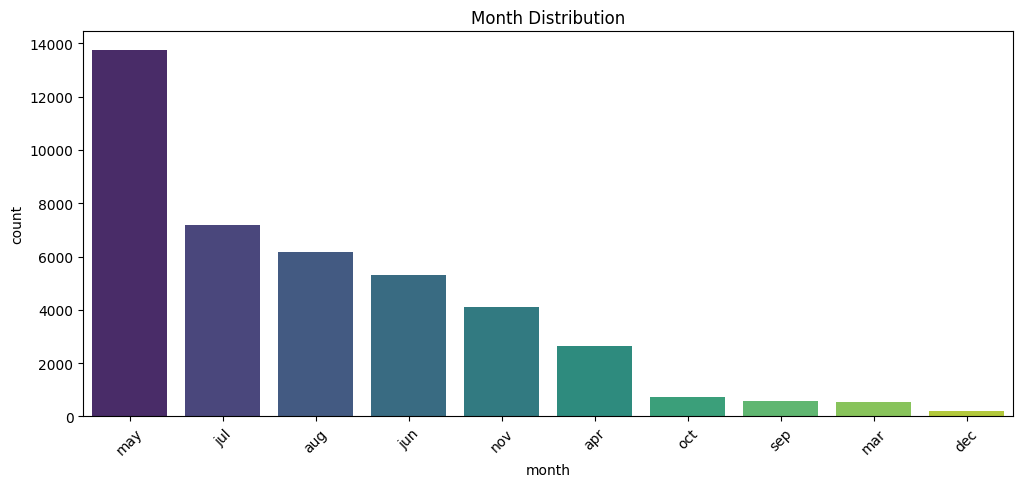

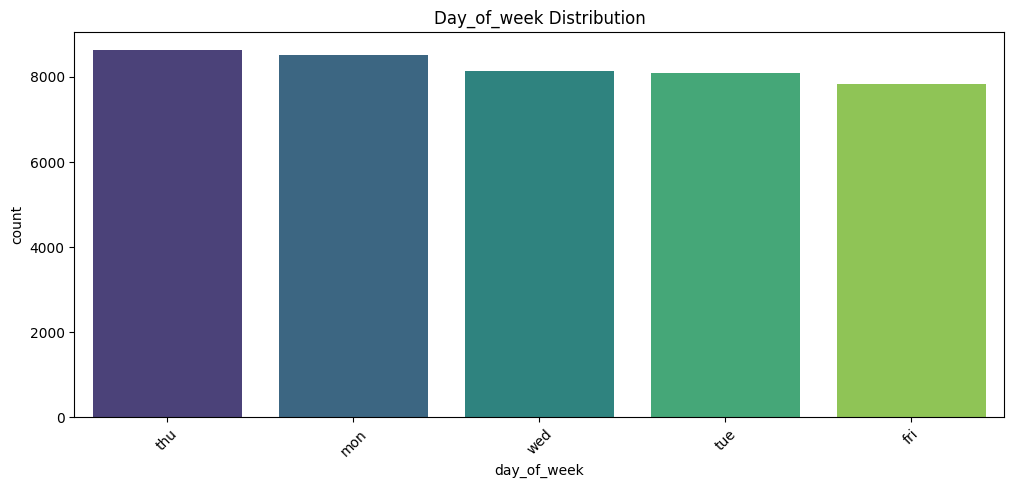

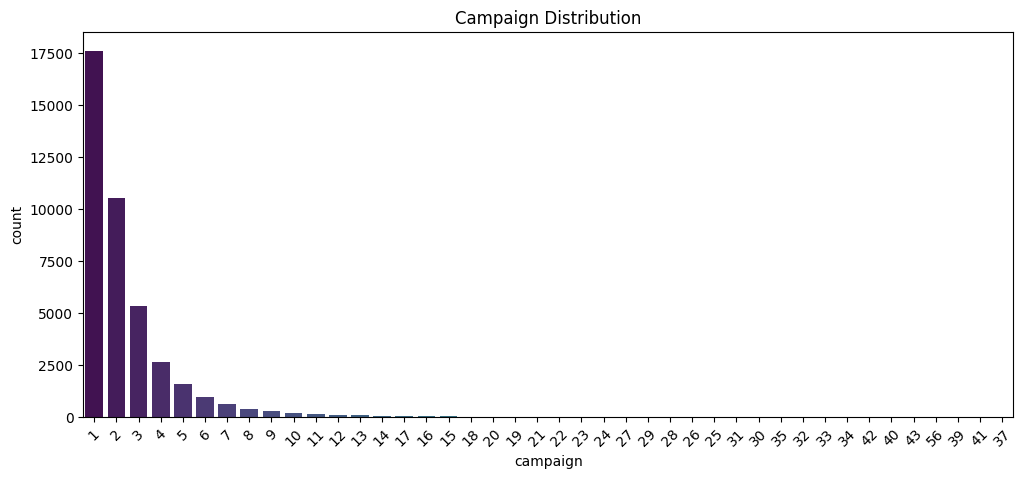

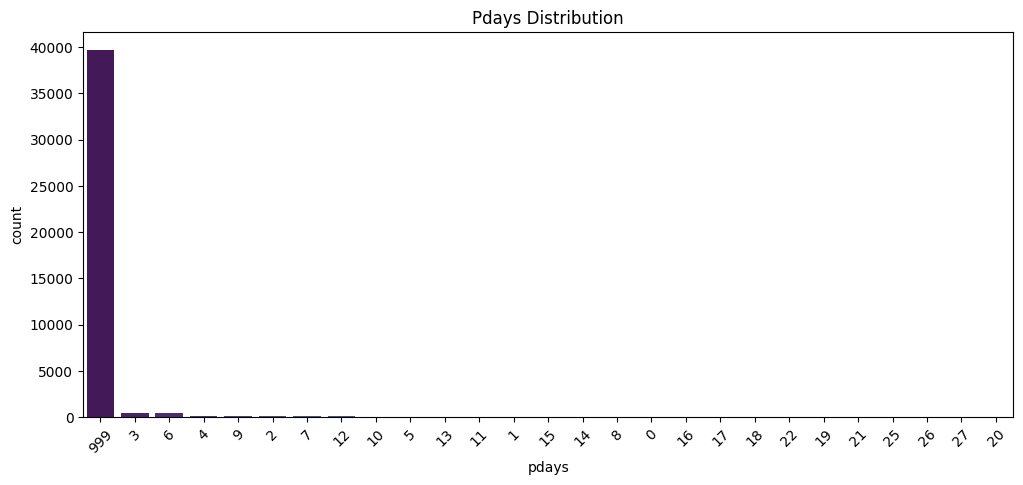

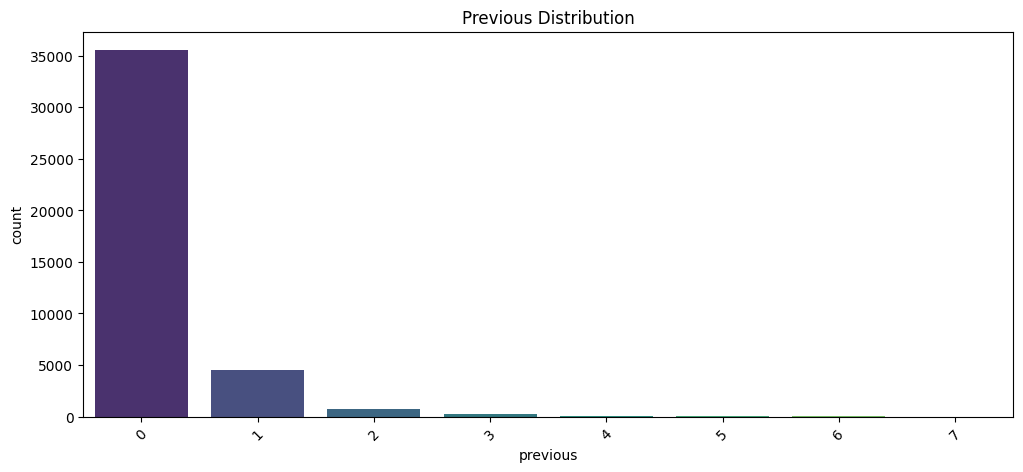

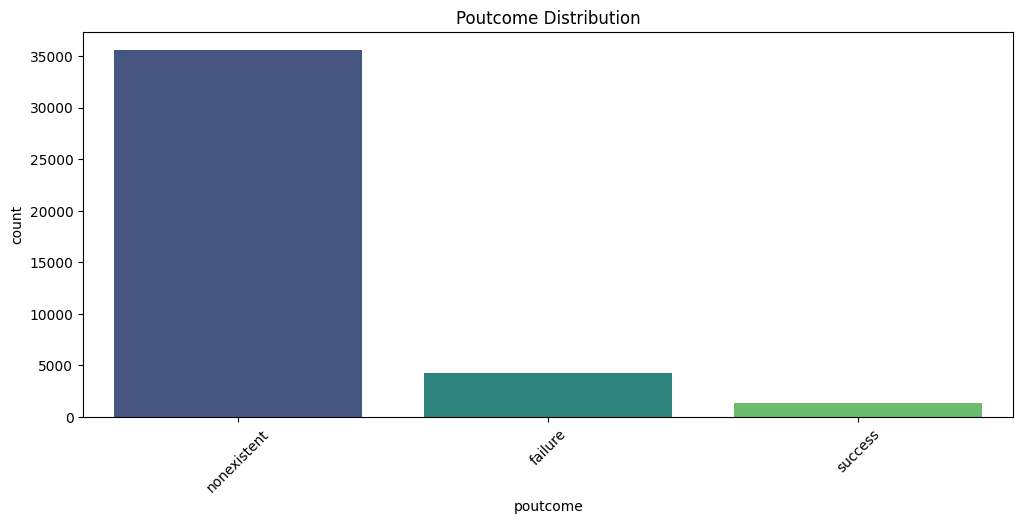

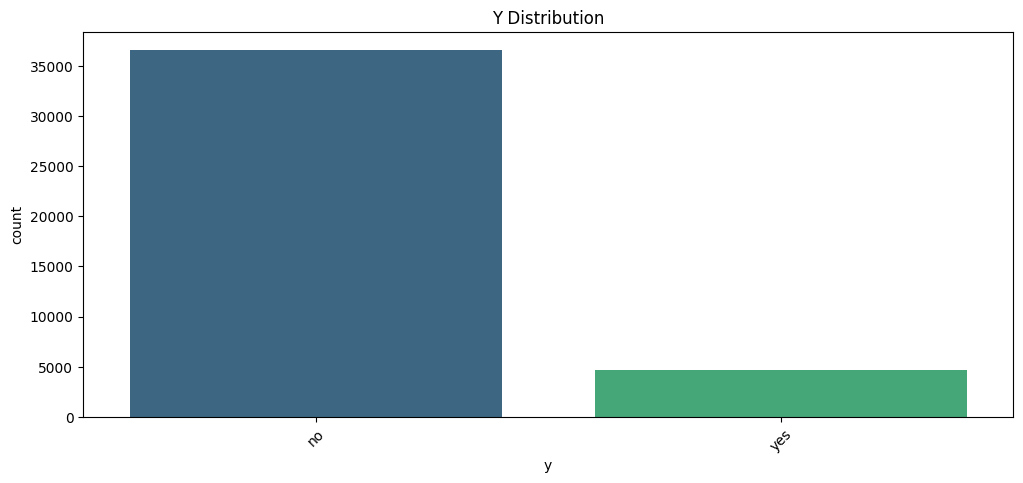

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt 

cat_cols = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',  
    'campaign', 
    'pdays',
    'previous',
    'poutcome',
    'y'
]

for col in cat_cols:
    plt.figure(figsize=(12,5))
    order = marketing_cleaned[col].value_counts().index
    sns.countplot(x=col, data=marketing_cleaned, order = order, palette="viridis")
    plt.title(f"{col.capitalize()} Distribution") #capitalize the first word
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
marketing_cleaned[['duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']].describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cons.price.idx', y='emp.var.rate', data=marketing_cleaned)
plt.title("")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='euribor3m', y='emp.var.rate', data=marketing_cleaned)
plt.title("")
plt.show()

## 4. Logistic Regression (Incomplete)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = marketing_cleaned.drop('y', axis = 1)
y = marketing_cleaned['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify = y, 
                                                    random_state=2022)

## 5. Archive (Linear Regression)

In [ ]:
import numpy as np

# Sample data
X = np.array(marketing_cleaned['euribor3m'])
y = np.array(marketing_cleaned['emp.var.rate'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")

In [ ]:
# Sample data
X = np.array(marketing_cleaned['duration'])
y = np.array(marketing_cleaned['nr.employed'])

# Calculate means
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate standard deviations
sd_X = np.std(X, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(X, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_X

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_X

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

# Use the manually calculated coefficients to predict y values
y_pred = intercept + slope * X

print(f"Predicted values: {y_pred}")